# python-docx 数据处理

In [1]:
from docx import Document
import json
file_path = '/data/zxx/KAG/kag/examples/Test/7.智慧控电解决方案（物联安防类）-超市（≥500㎡）.docx'


In [12]:
# 读取表格
def read_docx_tables(file_path):
    doc = Document(file_path)
    tables = []
    for table in doc.tables:
        table_data = []
        for row in table.rows:
            row_data = [cell.text for cell in row.cells]
            table_data.append(row_data)
        tables.append(table_data)
    return tables

In [8]:
# 示例用法
tables = read_docx_tables(file_path)
for table in tables:
    for row in table:
        print(row)

['服务类型', '设备类型', '设备参数', '数量']
['电气火灾监测', '组合式电气火灾监控探测', '具备24小时配电系统的实时监测，提供远程实时电气参数数据监控服务；监控（阈值）报警项符合GB14287.1-2014  4.3/5.2，GB14287.2-2014 5.3/6.3/5.7/6.5/5.8/6.6，GB14287.3-2014  5.3/6.3/5.7/6.5规定。监测量程： 剩余电流0~2500mA；温度 0~120℃；三相电压0~380V；三相电流0~600A', '1']
['线路管控', '物联计量导轨式开关', '不影响原线路的电路保护功能；具备监控用电器当前运行状态、功率、电压、电流、温度、累积用电量数据信息、数据通讯交互及异常告警等功能，同时实现远程的负载通断电控制等。额定电压：AC220V±10%；额定输出电流；≤60A ；最大负载；11kW', '3']
['能耗监管', '中央空调控制器', '应能对空调的模式、温度、风速、开关等进行设定控制管理，实现实时数据通讯交互能力，实现空调设备的远程数据监控与控制，不影响原有空调的正常使用。工作环境：温度 0~45℃；采用设备与空调室外机数据通讯手段，以实现设备通过室外机管控室内机全部空调', '3']
['能耗监管', '柜式空调控制器', '应能对空调的模式、温度、风速、开关等进行设定控制管理，实现实时数据通讯交互能力，实现空调设备的远程数据监控与控制，不影响原有空调的正常使用。工作环境：温度 0~45℃；设备针对室内机柜式（非16A标准插座空调）分体空调进行集中管控，根据现场柜式空调接线形式，选择合适的设备与接线方式，采用设备红外发射管实现设备管控柜式空调', '3']
['能耗监管', '壁挂空调控制器', '应能对空调的模式、温度、风速、开关等进行设定控制管理，实现实时数据通讯交互能力，实现空调设备的远程数据监控与控制，不影响原有空调的正常使用。工作环境：温度 0~45℃；设备针对室内机壁挂（标准16A插座空调）分体空调进行集中管控，直接加装设备插座，采用设备红外发射管实现设备管控壁挂空调。', '3']
['能耗监管', '智能开关面板（一开）', '其整体使用能力不低于原有传统设备的性能，能够保证原有本地开关控制不受影响；实现照明等终端的远程控制管理，终端状态信

In [13]:
def docx_to_json(file_path):
    doc = Document(file_path)
    doc_content = {"sections": []}
    current_section = {"title": "", "paragraphs": []}

    for paragraph in doc.paragraphs:
        if paragraph.text == "":
            continue
        if paragraph.style.name.startswith('Heading') or paragraph.style.name == "List Paragraph":
            if current_section["paragraphs"]:
                doc_content["sections"].append(current_section)
                current_section = {"title": "", "paragraphs": []}
            
            current_section["title"] = paragraph.text
        else:
            current_section["paragraphs"].append(paragraph.text)
    
    if current_section["paragraphs"]:
        doc_content["sections"].append(current_section)

    return json.dumps(doc_content, ensure_ascii=False, indent=4)



In [14]:
json_content = docx_to_json(file_path)

In [15]:
print(json_content)

{
    "sections": [
        {
            "title": "项目背景",
            "paragraphs": [
                "根据客户布局规划，结合客户需求，主要针对中小型超市内照明系统进行集中管控，节能降耗；搭配前端用电监测，24小时设备用电安全监控，通过各线路电压差分析，了解各线路的线损程度，精确排查线路隐患位置；仓储区域安全管理，防火防灾；员工远程智能控制，通过电信自有应用平台实现自动存储实时数据、报警记录和故障事件，支持导出各类数据报表用于用电及安全分析排查。"
            ]
        },
        {
            "title": "建设需求",
            "paragraphs": [
                "本方案的总体目标是设计符合中小型超市的整体用电建设体系，实现安全而便捷的用电系统，提升用电及仓储的安全性，同时在一定程度上减少用电损耗，达到节能减排的效果。",
                "本方案适用超市面积：500-1000m²左右",
                "具体建设需求内容包括：",
                "对超市配电柜安装电气火灾安全监测装置进行用电监测。",
                "在不影响当前线路的电路保护功能下、对线路保护进行安全设置、实现远程的负载通断电控制。",
                "实时监测各区域用电功率情况，具备自动断电保护，对各设备用电行为进行运行状态读取监测及远程智能控制。",
                "4、对仓储、办公等重要区域进行出入管控和安全监控",
                "5、提供web端、移动端、中控屏一屏展示等多种设备管理及运行状况显示方式，图形化数据显示用电情况。"
            ]
        },
        {
            "title": "总体架构",
            "paragraphs": [
                "根据前述的需求分析、产品架构设计如下："
            ]
        }
    ]
}


## 使用openSPG自带的数据处理
`本质调用的python-docx进行处理的`

In [11]:
file_path = "/data/zxx/KAG/kag/examples/Test/builder/data/supermarket.docx"
from kag.builder.component.reader import DocxReader, PDFReader
DxReader = DocxReader()
data = DxReader.invoke(file_path)

In [15]:
data[5]

<Chunk>: {'id': '04b0fedb608eab959feae6791efdf7dda1c68b6ed411575a457328e277ecd7c8', 'name': 'supermarket#', 'content': ''}

In [19]:
print(doc)

` python-docx 问题1`
识别docx，一些style是'List Paragraph'，但是有的heading也是这种格式，而paragraph也是这种格式，导致段落和标题之间是没有主次的。建设内容那一节，paragraph的格式也是'List Paragraph',样式是很难统一，所以读取困难。


# docling

In [11]:
from docling.backend.pypdfium2_backend import PyPdfiumDocumentBackend
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PipelineOptions
from docling.document_converter import DocumentConverter, PdfFormatOption, WordFormatOption
from docling.models.ocr_mac_model import OcrMacOptions
from docling.models.tesseract_ocr_cli_model import TesseractCliOcrOptions
from docling.models.tesseract_ocr_model import TesseractOcrOptions
from docling.datamodel.pipeline_options import (
    AcceleratorDevice,
    AcceleratorOptions,
    PdfPipelineOptions,
    TesseractCliOcrOptions,
    TesseractOcrOptions,
)
from pathlib import Path

/data/zxx/miniconda3/envs/docling/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
input_doc_path = Path("/data/zxx/KAG/kag/examples/Test/7.智慧控电解决方案（物联安防类）-超市（≥500㎡）.docx")
pipeline_options = PipelineOptions()

pipeline_options.accelerator_options = AcceleratorOptions(
    num_threads=4, device=AcceleratorDevice.CPU
    )

doc_converter = DocumentConverter(
    format_options={
        InputFormat.DOCX: WordFormatOption(
                pipeline_options=pipeline_options # default for office formats and HTML
            )
    }
)

conv_result = doc_converter.convert(input_doc_path)

In [7]:
# import json
# output_dir = Path("/data/zxx/KAG/kag/examples/Test/")
# doc_filename = conv_result.input.file.stem

# with (output_dir / f"{doc_filename}.json").open("w", encoding="utf-8") as fp:
#     fp.write(json.dumps(conv_result.document.export_to_dict(), indent=4, ensure_ascii=False))

In [13]:
doc = conv_result.document

DoclingDocument(schema_name='DoclingDocument', version='1.0.0', name='7.智慧控电解决方案（物联安防类）-超市（≥500㎡）', origin=DocumentOrigin(mimetype='application/vnd.openxmlformats-officedocument.wordprocessingml.document', binary_hash=15661066603108094545, filename='7.智慧控电解决方案（物联安防类）-超市（≥500㎡）.docx', uri=None), furniture=GroupItem(self_ref='#/furniture', parent=None, children=[], name='_root_', label=<GroupLabel.UNSPECIFIED: 'unspecified'>), body=GroupItem(self_ref='#/body', parent=None, children=[RefItem(cref='#/pictures/0'), RefItem(cref='#/texts/0'), RefItem(cref='#/texts/1'), RefItem(cref='#/texts/2'), RefItem(cref='#/texts/3'), RefItem(cref='#/texts/4'), RefItem(cref='#/groups/0'), RefItem(cref='#/texts/6'), RefItem(cref='#/groups/1'), RefItem(cref='#/texts/8'), RefItem(cref='#/texts/9'), RefItem(cref='#/texts/10'), RefItem(cref='#/groups/2'), RefItem(cref='#/texts/14'), RefItem(cref='#/texts/15'), RefItem(cref='#/groups/3'), RefItem(cref='#/texts/17'), RefItem(cref='#/pictures/1'), RefItem(cref='
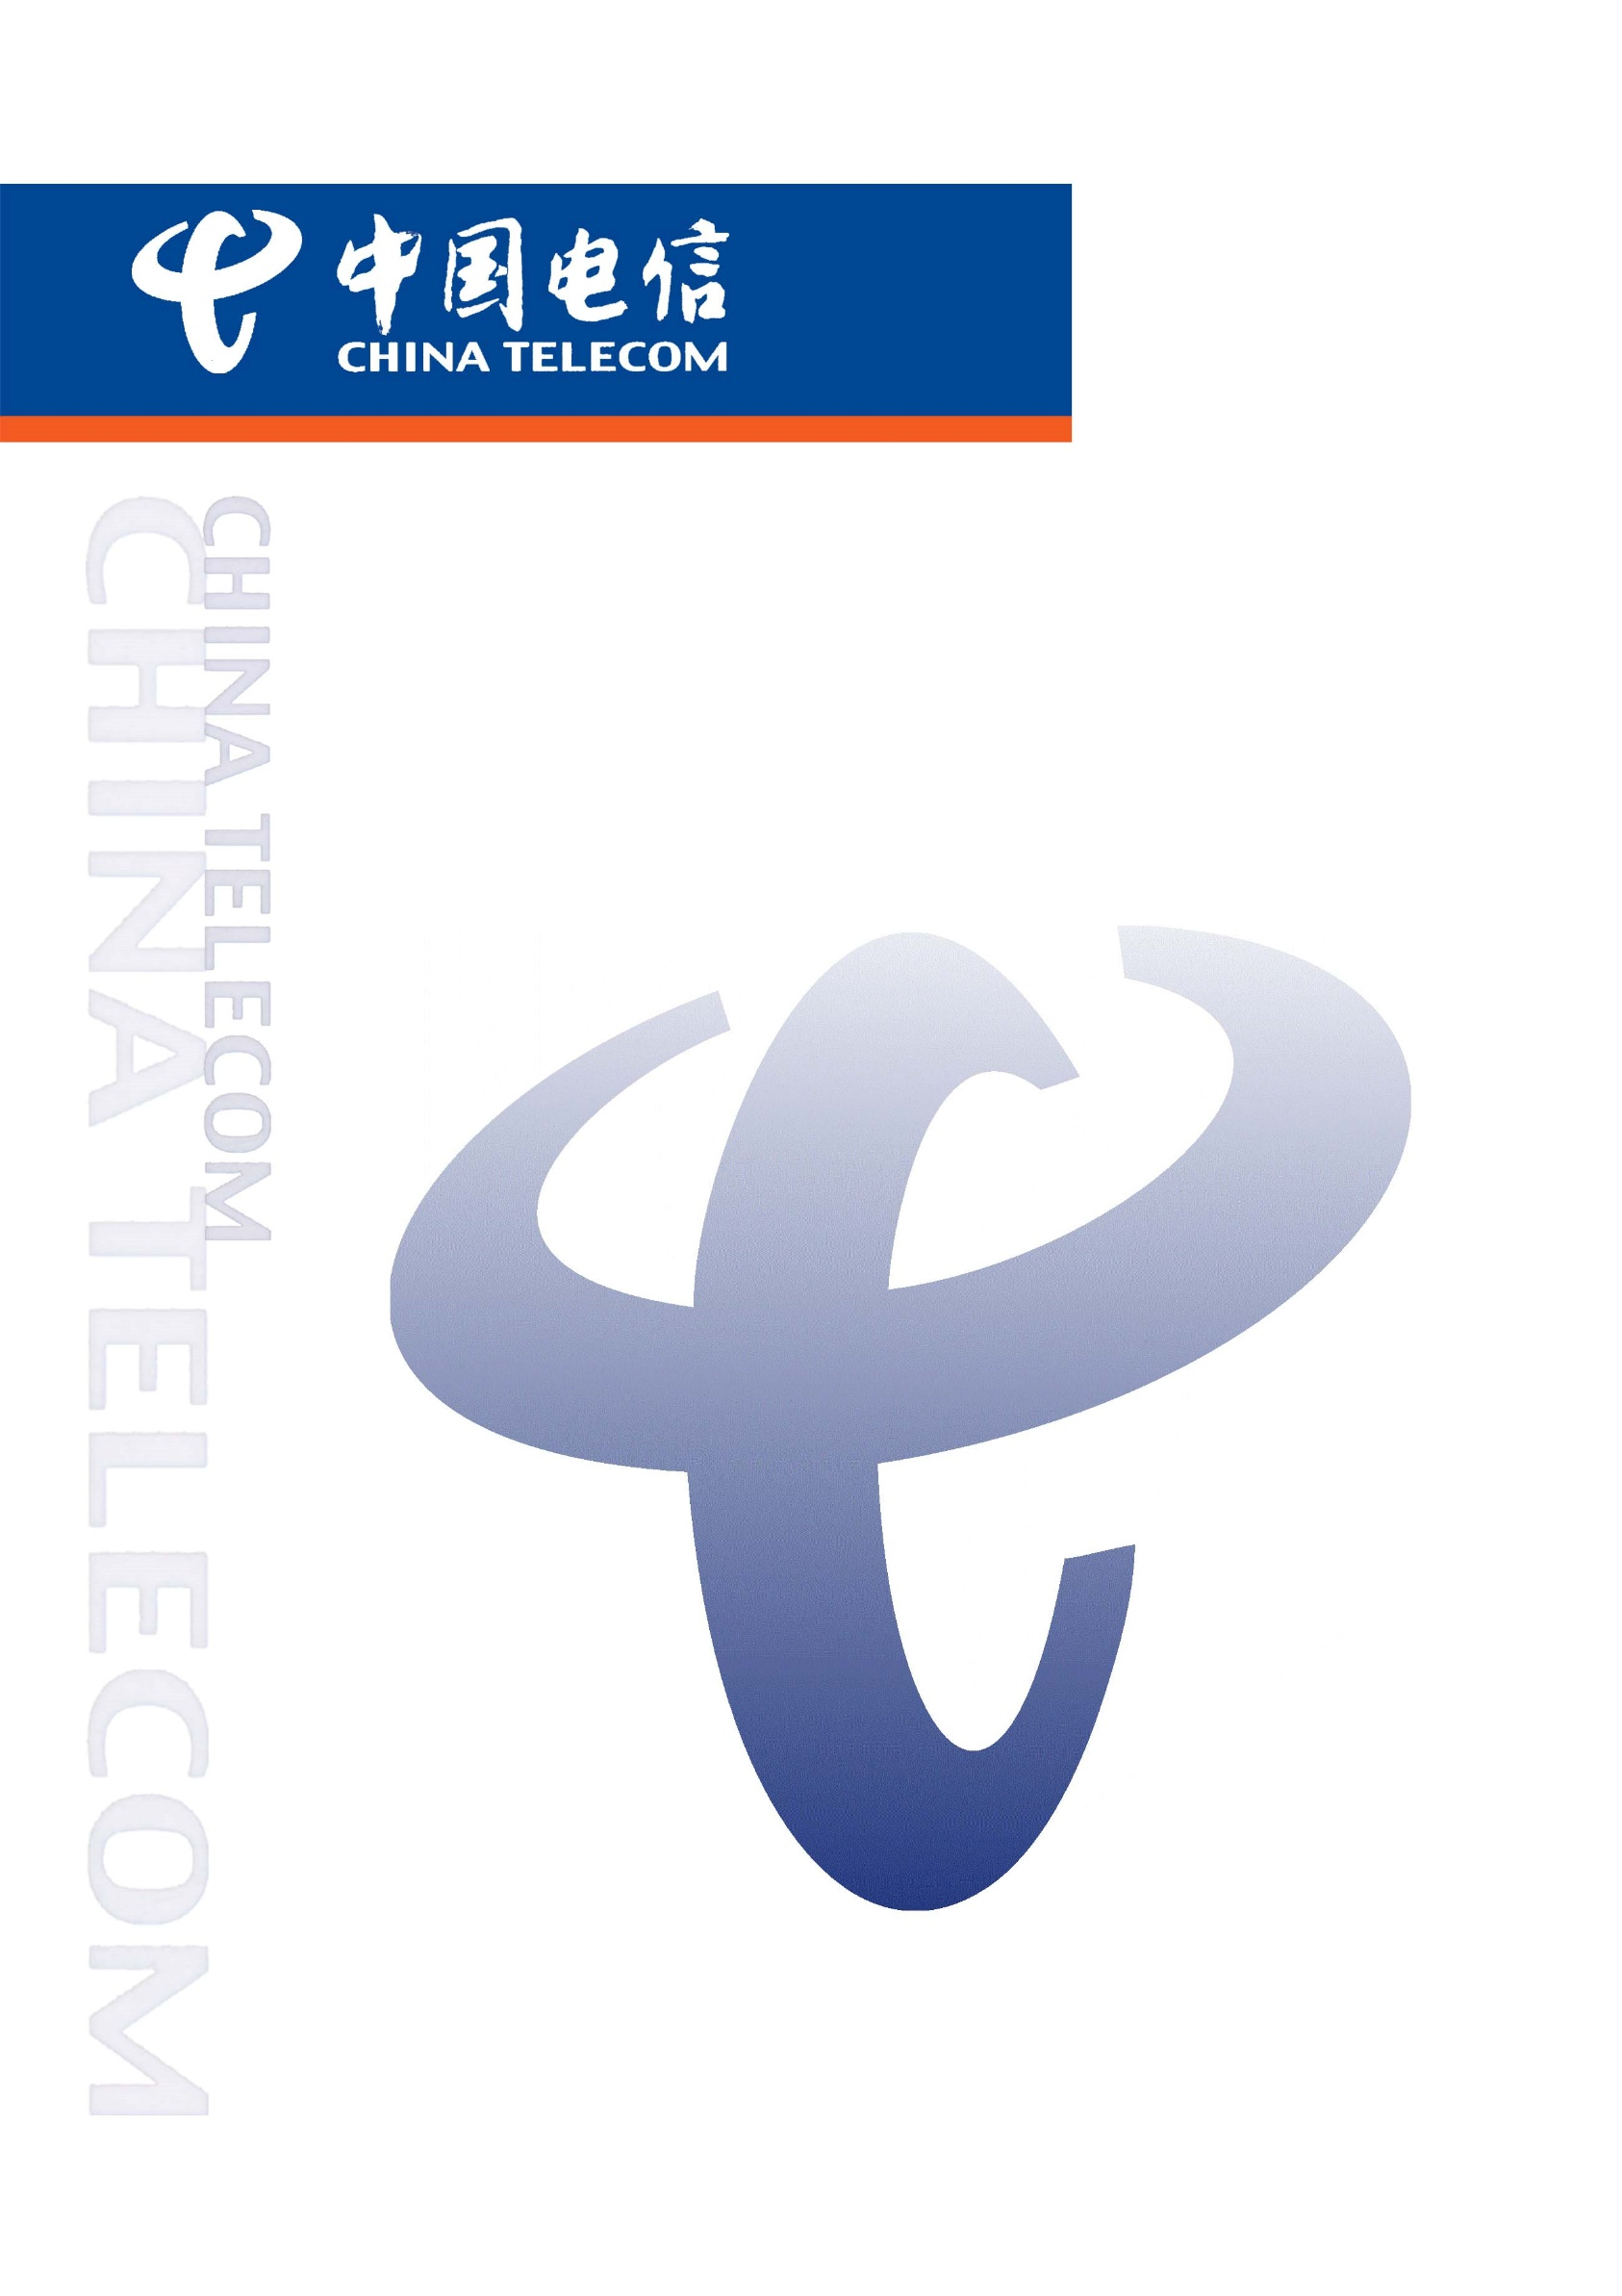
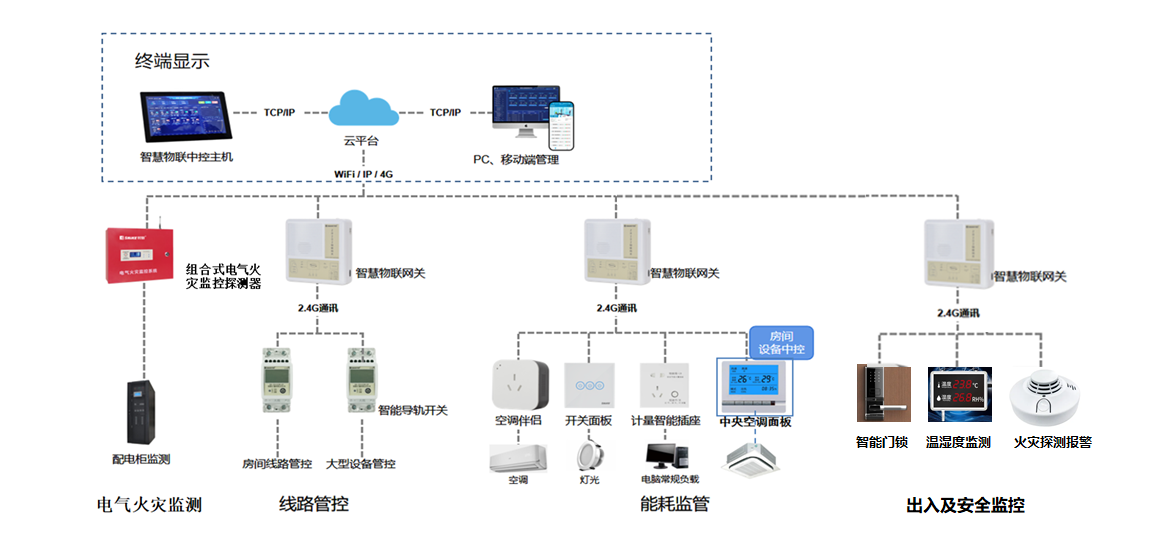
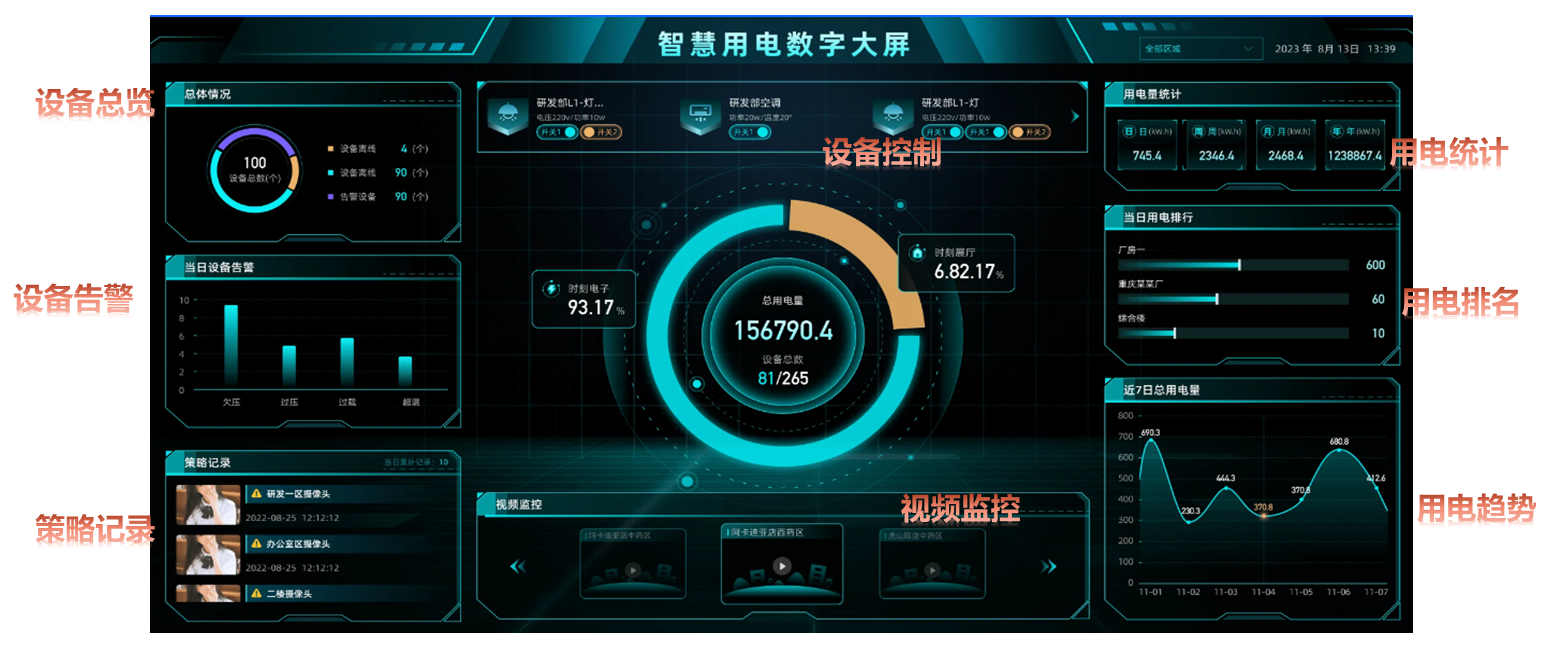
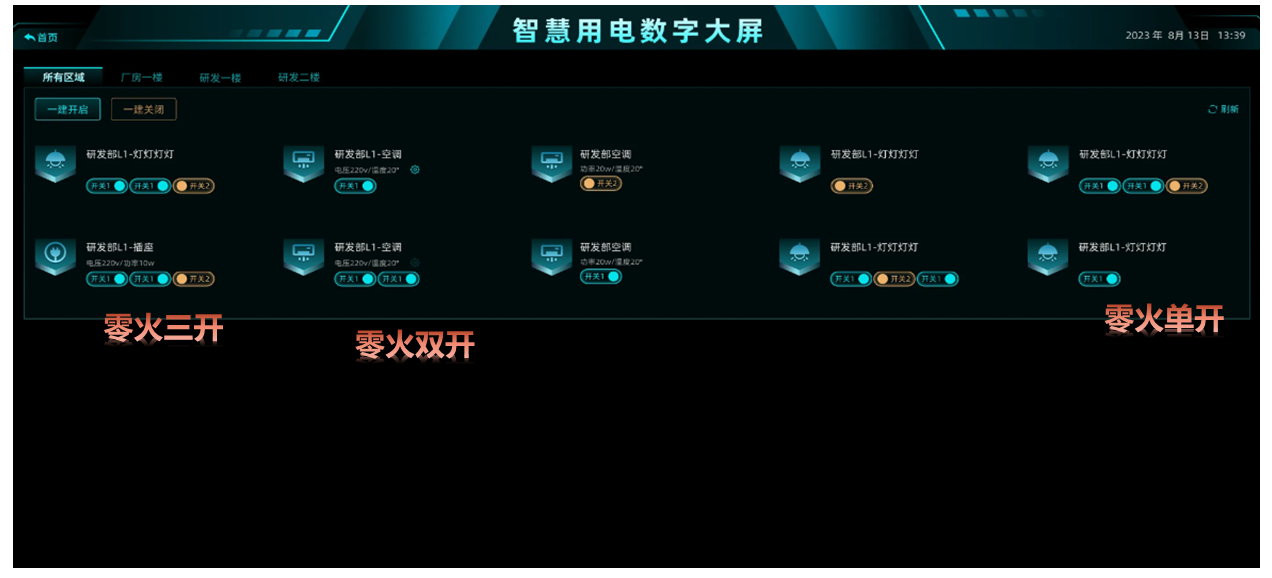
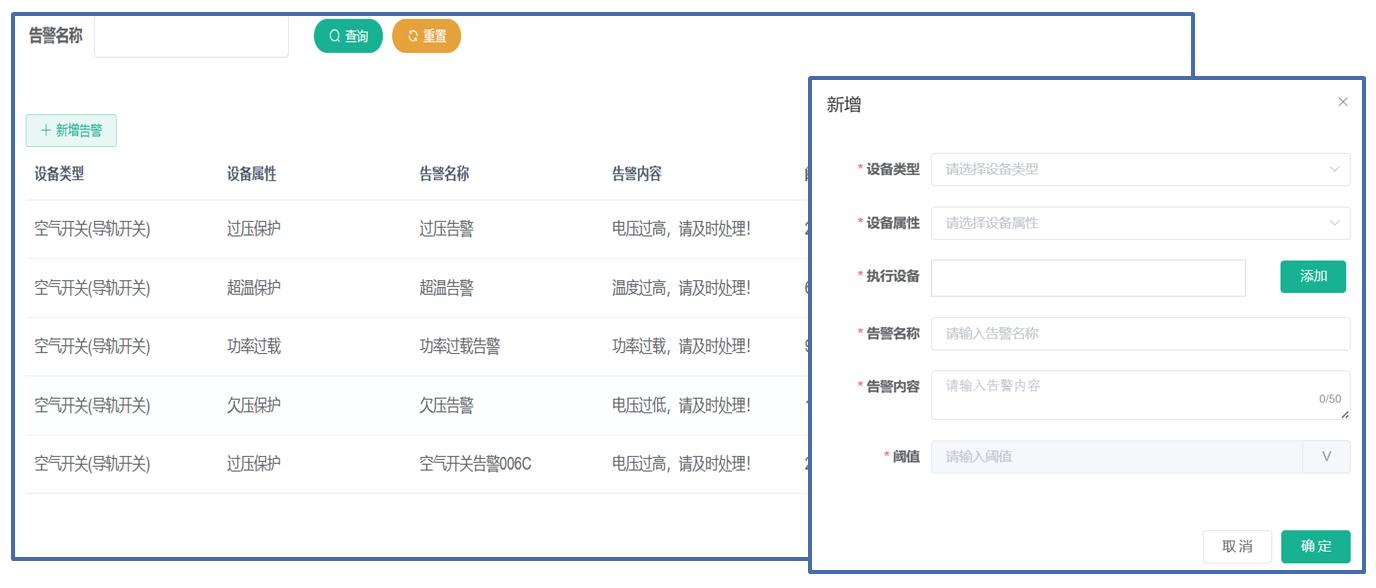

In [14]:
print(doc.export_to_dict())

# langchain 数据处理

In [4]:
from langchain.document_loaders import UnstructuredWordDocumentLoader


loader = UnstructuredWordDocumentLoader(file_path)
data = loader.load()

In [9]:
data[0].page_content

'\n\n项目背景\n\n根据客户布局规划，结合客户需求，主要针对中小型超市内照明系统进行集中管控，节能降耗；搭配前端用电监测，24小时设备用电安全监控，通过各线路电压差分析，了解各线路的线损程度，精确排查线路隐患位置；仓储区域安全管理，防火防灾；员工远程智能控制，通过电信自有应用平台实现自动存储实时数据、报警记录和故障事件，支持导出各类数据报表用于用电及安全分析排查。\n\n建设需求\n\n本方案的总体目标是设计符合中小型超市的整体用电建设体系，实现安全而便捷的用电系统，提升用电及仓储的安全性，同时在一定程度上减少用电损耗，达到节能减排的效果。\n\n本方案适用超市面积：500-1000m²左右\n\n具体建设需求内容包括：\n\n对超市配电柜安装电气火灾安全监测装置进行用电监测。\n\n在不影响当前线路的电路保护功能下、对线路保护进行安全设置、实现远程的负载通断电控制。\n\n实时监测各区域用电功率情况，具备自动断电保护，对各设备用电行为进行运行状态读取监测及远程智能控制。\n\n4、对仓储、办公等重要区域进行出入管控和安全监控\n\n5、提供web端、移动端、中控屏一屏展示等多种设备管理及运行状况显示方式，图形化数据显示用电情况。\n\n解决方案\n\n总体架构\n\n\n\n根据前述的需求分析、产品架构设计如下：\n\n建设内容\n\n电气火灾监测：通过组合式电气火灾监控探测器24h监测相电压、电流、剩余电流、线路温度状态异常等。\n\n线路管控：物联计量智能导轨开关可读取电器当前运行状态、功率、电压、电流、温度、累积用电量信息等功能，支持远程控制等\n\n能耗监管：通过开关面板、计量智能插座、空调伴侣、中央空调面板等智能终端对超市用电设备进行运行状态读取及远程控制。\n\n出入及安全监控：通过智能门锁对超市仓库及办公等重要区域进行出入管控，通过温湿度，火灾探测报警等设备对超市环境安全进行监控\n\n数据连接：智慧物联网关，也是一个智能中枢，可连接智能导轨开关、智能开关面板等子设备进行组网通信,采集各终端数据后进行统一上传，并接收后台下发指令实现智能设备远程控制，操作便捷\n\n图形化展示：可根据需要，将智慧用电中控屏安装于办公室、保安室，显示指定区域内的节点设备运行的状况，提供设备数据统计及远程集中管控，当节点\n\n\n\n设备故障时中控屏能够快速响应，

# llamaInde 数据处理
`调用的docx2txt`

In [3]:
import docx2txt
with fs.open(str(file)) as f:
    text = docx2txt.process(f)

metadata = {"file_name": file.name}
if extra_info is not None:
    metadata.update(extra_info)

NameError: name 'fs' is not defined

In [1]:
from kag.common.base.prompt_op import PromptOp
std_prompt = PromptOp.load('default', "std")(language='zh')
triple_prompt = PromptOp.load('default', "triple")(
    language='zh'
)

In [2]:
print(std_prompt)

In [3]:
print(triple_prompt)

In [6]:
from knext.schema.client import SchemaClient
schema = SchemaClient(project_id=1).load()

In [7]:
schema

{'Doctor': {'desc': None,
  'name': 'Medicine.Doctor',
  'name_zh': '医生',
  'parent_type_name': 'Thing',
  'properties': {'desc': {'constraint': {},
                          'desc': None,
                          'index_type': 'TEXT',
                          'logical_rule': '',
                          'name': 'desc',
                          'name_zh': '描述',
                          'object_type_name': 'Text',
                          'property_group': None},
                 'description': {'constraint': {},
                                 'desc': None,
                                 'index_type': None,
                                 'logical_rule': '',
                                 'name': 'description',
                                 'name_zh': '描述',
                                 'object_type_name': 'Text',
                                 'property_group': None},
                 'id': {'constraint': {},
                        'desc': None,
                  

In [10]:
for type_name, spg_type in schema.items():
    print(spg_type.spg_type_enum)
    print(type_name, '___________',spg_type)

SpgTypeEnum.Entity
Equipment ___________ {'desc': None,
 'name': 'Test.Equipment',
 'name_zh': '设备',
 'parent_type_name': 'Thing',
 'properties': {'description': {'constraint': {},
                                'desc': None,
                                'index_type': None,
                                'logical_rule': '',
                                'name': 'description',
                                'name_zh': '描述',
                                'object_type_name': 'Text',
                                'property_group': None},
                'id': {'constraint': {},
                       'desc': None,
                       'index_type': None,
                       'logical_rule': '',
                       'name': 'id',
                       'name_zh': '实体主键',
                       'object_type_name': 'Text',
                       'property_group': None},
                'name': {'constraint': {},
                         'desc': None,
                        

# 测试Solver

In [1]:
import json
import logging
import os
import time
from typing import List

from kag.common.vectorizer import Vectorizer
from kag.interface.retriever.chunk_retriever_abc import ChunkRetrieverABC
from kag.interface.retriever.kg_retriever_abc import KGRetrieverABC
from kag.solver.logic.core_modules.common.base_model import LFPlanResult
from kag.solver.logic.core_modules.common.schema_utils import SchemaUtils
from kag.solver.logic.core_modules.common.text_sim_by_vector import TextSimilarity
from kag.solver.logic.core_modules.common.utils import generate_random_string
from kag.solver.logic.core_modules.config import LogicFormConfiguration
from kag.solver.logic.core_modules.lf_executor import LogicExecutor
from kag.solver.logic.core_modules.lf_generator import LFGenerator
from kag.solver.logic.core_modules.retriver.entity_linker import DefaultEntityLinker
from kag.solver.logic.core_modules.retriver.graph_retriver.dsl_executor import DslRunnerOnGraphStore
from kag.solver.logic.core_modules.retriver.schema_std import SchemaRetrieval
from knext.project.client import ProjectClient

from kag.common.graphstore.graph_store import GraphStore
from kag.interface.retriever.chunk_retriever_abc import ChunkRetrieverABC
from kag.interface.retriever.kg_retriever_abc import KGRetrieverABC
from kag.solver.common.base import Question
from kag.solver.logic.core_modules.common.base_model import LFPlanResult
from kag.solver.logic.core_modules.common.one_hop_graph import KgGraph
from kag.solver.logic.core_modules.common.schema_utils import SchemaUtils
from kag.solver.logic.core_modules.common.text_sim_by_vector import TextSimilarity
from kag.solver.logic.core_modules.config import LogicFormConfiguration
from kag.solver.logic.core_modules.op_executor.op_deduce.deduce_executor import DeduceExecutor
from kag.solver.logic.core_modules.op_executor.op_math.math_executor import MathExecutor
from kag.solver.logic.core_modules.op_executor.op_output.output_executor import OutputExecutor
from kag.solver.logic.core_modules.op_executor.op_retrieval.retrieval_executor import RetrievalExecutor
from kag.solver.logic.core_modules.op_executor.op_sort.sort_executor import SortExecutor
from kag.solver.logic.core_modules.parser.logic_node_parser import ParseLogicForm
from kag.solver.logic.core_modules.retriver.entity_linker import EntityLinkerBase
from kag.solver.logic.core_modules.retriver.graph_retriver.dsl_executor import DslRunner, DslRunnerOnGraphStore
from kag.solver.logic.core_modules.retriver.schema_std import SchemaRetrieval
from kag.solver.logic.core_modules.rule_runner.rule_runner import OpRunner
from kag.solver.tools.info_processor import ReporterIntermediateProcessTool

In [2]:
from kag.solver.logic.solver_pipeline import SolverPipeline
resp = SolverPipeline()
init_query = "甲状腺结节可以吃什么药？"

## finnal 测试

In [1]:
solved_answer, supporting_fact, history_log = resp.reasoner.reason(init_query)

NameError: name 'resp' is not defined

In [7]:
solved_answer, supporting_fact, history_log

('',
 "query1: 查询甲状腺结节相关的药物\nanswer1: 抗甲状腺药物、复方碘口服液、卡比马唑\nquery2: output\nanswer2: 复方碘口服液、卡比马唑、丙基硫氧嘧啶、甲硫咪唑、甲基硫氧嘧啶\nPassages:['#甲状腺结节#甲状腺结节\\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\\n有些患者可以触摸到自己颈部前方的结节。\\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。', '#脂溢性皮炎#脂溢性皮炎\\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺

In [8]:
print(supporting_fact)

query1: 查询甲状腺结节相关的药物
answer1: 抗甲状腺药物、复方碘口服液、卡比马唑
query2: output
answer2: 复方碘口服液、卡比马唑、丙基硫氧嘧啶、甲硫咪唑、甲基硫氧嘧啶
Passages:['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，

In [13]:
present_instruction = init_query
resp.memory.save_memory(solved_answer, supporting_fact, instruction)

history_log['present_instruction'] = present_instruction
history_log['present_memory'] = resp.memory.serialize_memory()
resp.trace_log.append(history_log)

# Reflect the current instruction based on the current memory and instruction
if_finished, present_instruction = resp.reflector.reflect_query(resp.memory, present_instruction)

INFO:httpx:HTTP Request: POST https://api.siliconflow.cn/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.siliconflow.cn/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.siliconflow.cn/v1/chat/completions "HTTP/1.1 200 OK"


In [16]:
resp.memory.state_memory,'\n****\n', resp.memory.evidence_memory,'\n****\n',  resp.memory.instruction_set,'\n****\n', resp.memory.exact_answer

(["问题'甲状腺结节可以吃什么药？' 的答案是 '答案：抗甲状腺药物，包括硫脲类化合物（丙基硫氧嘧啶（PTU）、甲基硫氧嘧啶（MTU）等）、咪唑类化合物（甲硫咪唑和卡比马唑），以及复方碘口服液（Lugol液）。'",
  "问题'甲状腺结节可以吃什么药？' 的答案是 '答案：抗甲状腺药物，包括硫氧嘧啶类化合物（丙基硫氧嘧啶和甲基硫氧嘧啶）和咪唑类化合物（甲硫咪唑和卡比马唑）。'"],
 '\n****\n',
 ['甲状腺结节是一种常见的甲状腺疾病，其特征是甲状腺内出现肿块。虽然大多数甲状腺结节并无症状，但某些情况下，患者可能会感到颈部疼痛、咽喉部异物感或压迫感。治疗方面，通常可以使用放射性碘治疗、复方碘口服液或抗甲状腺药物来抑制甲状腺激素的分泌。\n\n目前常用的抗甲状腺药物包括硫脲类化合物，如硫氧嘧啶类的丙基硫氧嘧啶（PTU）和甲基硫氧嘧啶（MTU），以及咪唑类的甲硫咪唑和卡比马唑。这些药物可以有效地抑制甲状腺激素的分泌，减轻症状并改善患者的生活质量。\n\n需要注意的是，甲状腺结节的治疗应在医生指导下进行。患者应根据医生的建议选择合适的治疗方法，并定期接受监测，以确保治疗的有效性和安全性。',
  '甲状腺结节是一种常见的病症，通常可通过药物治疗来控制。目前常用的抗甲状腺药物包括硫氧嘧啶类化合物和咪唑类化合物。硫氧嘧啶类化合物包括丙基硫氧嘧啶（PTU）和甲基硫氧嘧啶（MTU），这两种药物可抑制甲状腺激素的分泌。咪唑类化合物包括甲硫咪唑和卡比马唑，也可用于治疗甲状腺结节。\n\n还有一些其他的药物也可用于治疗甲状腺结节，例如复方碘口服液（Lugol液），这是一种常用的治疗甲状腺结节的药物，它可以抑制甲状腺激素的分泌。另外，抗组胺药和抗真菌药也可用于治疗甲状腺结节的相关症状。\n\n需要注意的是，甲状腺结节的治疗应根据病人的具体情况进行，医生会根据病人的情况选择合适的药物来治疗。同时，患者也应按照医生指示的使用药物，服用时应注意避免不良副作用。\n\n总之，甲状腺结节的治疗主要依靠药物来控制症状，患者应按照医生指示使用药物，并注意服用时的注意事项。',
  '甲状腺结节是一种常见的病症，通常表现为甲状腺内的肿块，可以随吞咽动作随甲状腺而上下移动。根据提供的信息，治疗甲状腺结节的方法包括：\n\n* 放射性碘治疗\n* 复方碘口服液（Lugol液）\n* 抗甲状腺

## plan和reason测试

In [4]:
# 其最终给下一步的是lf_nodes:  List[LFPlanResult],每个LFPlanResult有两属性一个是sub_query，一个是lf_nodes，分别对应子问题和子问题对应的逻辑形式
lf_nodes = resp.reasoner.lf_planner.lf_planing(init_query)

INFO:httpx:HTTP Request: POST http://192.168.171.166:20500/v1/chat/completions "HTTP/1.1 200 OK"


In [5]:
for lf in lf_nodes:
    sub_query, sub_logic_nodes = lf.query, lf.lf_nodes
    print(sub_query, sub_logic_nodes)

 查询甲状腺结节可以吃的药物 [get_spo(s=s1:疾病[甲状腺结节] ,p=p1:治疗药物,o=o1:None ,sub_query= 查询甲状腺结节可以吃的药物)]
output [get(alias_name=o1,alias_name_set=[o1],sub_query=output)]


In [9]:
self = resp.reasoner.lf_solver
req_id = generate_random_string(10)
executor = LogicExecutor(
                init_query, self.project_id, self.schema,
                kg_retriever=self.kg_retriever,
                chunk_retriever=self.chunk_retriever,
                std_schema=self.std_schema,
                el=self.el,
                text_similarity=self.text_similarity,
                dsl_runner=DslRunnerOnGraphStore(self.project_id, self.schema, LogicFormConfiguration({
                    "KAG_PROJECT_ID": self.project_id,
                    "KAG_PROJECT_HOST_ADDR": self.host_addr
                })),
                generator=self.generator,
                report_tool=self.report_tool,
                req_id=req_id
            )



In [10]:
test_logic_node = lf_nodes[0].lf_nodes[0]


In [11]:
n = test_logic_node

In [12]:
executor.kg_graph.logic_form_base[n.s.alias_name] = n.s
executor.kg_graph.logic_form_base[n.p.alias_name] = n.p
executor.kg_graph.logic_form_base[n.o.alias_name] = n.o

In [13]:
executor.kg_graph.logic_form_base, executor.kg_graph.start_node_alias_name, executor.kg_graph.start_node_name,executor.kg_graph.query_graph,executor.kg_graph.nodes_alias,executor.kg_graph.edge_alias,executor.kg_graph.entity_map,executor.kg_graph.edge_map


({s1: s1:疾病, p1: p1:治疗药物, o1: o1:None}, [], [], {}, [], [], {}, {})

In [14]:
from kag.solver.logic.core_modules.parser.logic_node_parser import GetSPONode
from kag.solver.logic.core_modules.retriver.entity_linker import EntityLinkerBase, spo_entity_linker

el_results, el_request, err_msg, call_result_data = spo_entity_linker(executor.kg_graph,
                                                                              n,
                                                                              init_query,
                                                                              executor.el,
                                                                              executor.schema,
                                                                              req_id,
                                                                              executor.params)

INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"


In [15]:
n.s.get_entity_first_type()

'Disease'

In [16]:
# n.s.alias_name
self.schema.get_label_within_prefix(n.s.get_entity_first_type())

'Medicine.Disease'

In [17]:
n.s.value_list

[]

In [18]:
s_data = executor.kg_graph.get_entity_by_alias(n.s.alias_name)

In [19]:
s_data

[甲状腺结节 [Medicine.Chunk],
 甲状腺结节 [Medicine.Disease],
 甲状腺结节 [Medicine.Others],
 甲状腺 [Medicine.HumanBodyPart],
 甲状腺 [Medicine.Others]]

In [20]:
executor.kg_graph.logic_form_base, executor.kg_graph.start_node_alias_name, executor.kg_graph.start_node_name, executor.kg_graph.query_graph, executor.kg_graph.nodes_alias, executor.kg_graph.edge_alias, executor.kg_graph.entity_map, executor.kg_graph.edge_map


({s1: s1:疾病, p1: p1:治疗药物, o1: o1:None},
 [],
 [],
 {p1: {'s': s1, 'p': p1, 'o': o1}},
 [s1],
 [],
 {s1: [甲状腺结节 [Medicine.Chunk],
   甲状腺结节 [Medicine.Disease],
   甲状腺结节 [Medicine.Others],
   甲状腺 [Medicine.HumanBodyPart],
   甲状腺 [Medicine.Others]]},
 {})

In [21]:
el_results, el_request, err_msg, call_result_data

([[甲状腺结节 [Medicine.Chunk],
   甲状腺结节 [Medicine.Disease],
   甲状腺结节 [Medicine.Others],
   甲状腺 [Medicine.HumanBodyPart],
   甲状腺 [Medicine.Others]]],
 {'nl_query': '甲状腺结节可以吃什么药？', 'entity_mentions': [s1:疾病]},
 '',
 [{'res': [甲状腺结节 [Medicine.Chunk],
    甲状腺结节 [Medicine.Disease],
    甲状腺结节 [Medicine.Others],
    甲状腺 [Medicine.HumanBodyPart],
    甲状腺 [Medicine.Others]],
   'recalls': {},
   'content': '甲状腺结节可以吃什么药？'}])

In [22]:
n.s

s1:疾病

In [23]:
n.s.get_entity_first_type_or_zh()

'Disease'

In [24]:
solved_answer, sub_qa_pair, recall_docs, history_qa_log  = self.solve(init_query, lf_nodes)

INFO:httpx:HTTP Request: POST http://192.168.171.166:20500/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20500/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP

[{'entity': '抗甲状腺药物', 'category': 'Medicine'}, {'entity': '复方碘口服液', 'category': 'Medicine'}, {'entity': 'lugol液', 'category': 'Medicine'}]


INFO:httpx:HTTP Request: POST http://192.168.171.166:20500/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20500/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:TmS07pVdrO call by docs cost: 7.075900316238403 docs num=2
INFO:root:TmS07pVdrO call_kb_paths cost=21.389976263046265 kg_path=[{'s': 'Medicine.Disease[甲状腺结节]', 'p': '可以用', 'o': ['Medicine.Medicine[抗甲状腺药物]', 'Medicine.Medicine[复方碘口服液]', 'Medicine.Medicine[复方碘口服液 lugol液]']}]


In [25]:
solved_answer, sub_qa_pair, recall_docs, history_qa_log 

('',
 ['query1:  查询甲状腺结节可以吃的药物\nanswer1: 抗甲状腺药物，复方碘口服液，复方碘口服液 lugol液',
  'query2: output\nanswer2: 复方碘口服液(Lugol液), 抗甲状腺药物, 丙基硫氧嘧啶(PTU), 甲基硫氧嘧啶(MTU), 甲硫咪唑, 卡比马唑'],
 ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。',
  '#甲状腺结节',
  '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外

In [22]:
supporting_fact = '\n'.join(sub_qa_pair)

In [23]:
supporting_fact

'query1: 查询甲状腺结节相关的药物\nanswer1: 卡比马唑、抗甲状腺药物、复方碘口服液\nquery2: output\nanswer2: 卡比马唑、抗甲状腺药物、复方碘口服液'

In [24]:

sub_querys = [lf.query for lf in lf_nodes]

In [27]:
sub_querys

['查询甲状腺结节相关的药物', 'output']

In [28]:
docs = self.chunk_retriever.rerank_docs([init_query] + sub_querys, recall_docs)

In [29]:
docs

['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。',
 '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮

In [6]:
if executor.chunk_retriever and hasattr(executor.chunk_retriever, 'get_std_ner_by_query'):
    query_ner_list = executor.chunk_retriever.get_std_ner_by_query(init_query)

INFO:httpx:HTTP Request: POST http://192.168.171.166:20500/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20500/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"


In [7]:
query_ner_list

{'甲状腺结节_Medicine.Disease': {'name': '甲状腺结节',
  'type': 'Medicine.Disease',
  'score': 0.9996118545532227}}

In [8]:

lf =  lf_nodes[0]
sub_query, sub_logic_nodes = lf.query, lf.lf_nodes
sub_logic_nodes_str = "\n".join([str(ln) for ln in sub_logic_nodes])
question = executor._create_sub_question_report_node(0, sub_logic_nodes_str, sub_query)
kg_qa_result, spo_retrieved = executor._execute_lf(sub_logic_nodes)


INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20500/v1/chat/completions "HTTP/1.1 200 OK"


In [45]:
spo_retrieved, kg_qa_result, sub_query

(['(甲状腺结节 applicableMedicine 甲硫咪唑)',
  '(甲状腺结节 applicableMedicine [])',
  '(甲状腺结节 applicableMedicine 卡比马唑)',
  '(甲状腺结节 applicableMedicine [])',
  '(甲状腺结节 applicableMedicine 丙基硫氧嘧啶(PTU))',
  '(甲状腺结节 applicableMedicine [])',
  '(甲状腺结节 applicableMedicine 甲基硫氧嘧啶(MTU))',
  '(甲状腺结节 applicableMedicine [])'],
 [],
 ' 查询甲状腺结节的治疗药物')

In [26]:
all_related_entities = executor.kg_graph.get_all_entity()
all_related_entities = list(set(all_related_entities))

In [27]:
all_related_entities

[甲状腺 [Medicine.HumanBodyPart],
 甲状腺结节 [Medicine.Others],
 甲状腺结节 [Medicine.Chunk],
 甲状腺结节 [Medicine.Disease],
 甲状腺 [Medicine.Others]]

In [12]:
all_related_entities[1].type, all_related_entities[1].name, all_related_entities[1].score

('Medicine.Disease', '甲状腺结节', 0.9995741844177246)

In [13]:

params = {
            'related_entities': all_related_entities,
            'query_ner_dict': query_ner_list,
            'req_id': executor.req_id
        }
# Retrieve chunks using the updated parameters.
sub_query_with_history_qa = executor._generate_sub_query_with_history_qa([], sub_query)

# 根据实体进行文档检索，没有使用BM25的那种进行分词，之后检索
docs_with_score = executor.chunk_retriever.recall_docs(sub_query_with_history_qa, top_k=10, **params)

INFO:httpx:HTTP Request: POST http://192.168.171.166:20500/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20500/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:root:UhN9FdE3UR kgpath ner cost=3.575636625289917


In [15]:
for i in docs_with_score:
    print(i)

#甲状腺结节#甲状腺结节
甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。
临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。
甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。
患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。
有些患者可以触摸到自己颈部前方的结节。
在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。
甲状腺结节进展为其它甲状腺疾病的概率只有1%。
有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。
当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。
治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。
目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#9.74321460723877


In [16]:
docs = ["#".join(item.split("#")[:-1]) for item in docs_with_score]

In [19]:
for i in docs:
    print(i)

#甲状腺结节#甲状腺结节
甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。
临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。
甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。
患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。
有些患者可以触摸到自己颈部前方的结节。
在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。
甲状腺结节进展为其它甲状腺疾病的概率只有1%。
有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。
当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。
治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。
目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。


In [60]:
all_related_entities

[[] [attribute],
 甲基硫氧嘧啶(MTU) [Medicine.Medicine],
 甲状腺 [Medicine.Others],
 甲状腺结节 [Medicine.Disease],
 卡比马唑 [Medicine.Medicine],
 甲状腺结节 [Medicine.Chunk],
 甲硫咪唑 [Medicine.Medicine],
 甲状腺结节 [Medicine.Chunk],
 [] [attribute],
 卡比马唑 [Medicine.Medicine],
 甲状腺结节 [Medicine.Chunk],
 丙基硫氧嘧啶(PTU) [Medicine.Medicine],
 [] [attribute],
 甲状腺结节 [Medicine.Chunk],
 [] [attribute],
 甲基硫氧嘧啶(MTU) [Medicine.Medicine],
 [] [attribute],
 丙基硫氧嘧啶(PTU) [Medicine.Medicine],
 甲状腺结节 [Medicine.Disease],
 甲硫咪唑 [Medicine.Medicine],
 [] [attribute],
 [] [attribute],
 甲状腺结节 [Medicine.Others],
 [] [attribute],
 [] [attribute],
 [] [attribute],
 甲状腺结节 [Medicine.Chunk],
 [] [attribute],
 [] [attribute],
 甲状腺 [Medicine.HumanBodyPart]]

In [52]:
all_related_entities, sub_answer = executor._generate_sub_answer_by_graph(
                [], kg_qa_result, spo_retrieved, sub_query)

INFO:httpx:HTTP Request: POST http://192.168.171.166:20500/v1/chat/completions "HTTP/1.1 200 OK"


In [54]:
sub_answer

'甲硫咪唑, 卡比马唑, 丙基硫氧嘧啶(PTU), 甲基硫氧嘧啶(MTU)'

In [55]:
for i in all_related_entities:
    print(i)

[] [attribute]
甲基硫氧嘧啶(MTU) [Medicine.Medicine]
甲状腺 [Medicine.Others]
甲状腺结节 [Medicine.Disease]
卡比马唑 [Medicine.Medicine]
甲状腺结节 [Medicine.Chunk]
甲硫咪唑 [Medicine.Medicine]
甲状腺结节 [Medicine.Chunk]
[] [attribute]
卡比马唑 [Medicine.Medicine]
甲状腺结节 [Medicine.Chunk]
丙基硫氧嘧啶(PTU) [Medicine.Medicine]
[] [attribute]
甲状腺结节 [Medicine.Chunk]
[] [attribute]
甲基硫氧嘧啶(MTU) [Medicine.Medicine]
[] [attribute]
丙基硫氧嘧啶(PTU) [Medicine.Medicine]
甲状腺结节 [Medicine.Disease]
甲硫咪唑 [Medicine.Medicine]
[] [attribute]
[] [attribute]
甲状腺结节 [Medicine.Others]
[] [attribute]
[] [attribute]
[] [attribute]
甲状腺结节 [Medicine.Chunk]
[] [attribute]
[] [attribute]
甲状腺 [Medicine.HumanBodyPart]


In [27]:
for n in sub_logic_nodes:
    kg_graph = executor.retrieval_executor.executor(n, executor.req_id, executor.params)
    cur_spo_set = executor.kg_graph.get_entity_by_alias(n.p.alias_name)



                

INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://192.168.171.166:20850/v1/embeddings "HTTP/1.1 200 OK"


In [33]:
cur_spo_set

[(甲状腺结节 applicableMedicine 甲硫咪唑),
 (甲状腺结节 applicableMedicine []),
 (甲状腺结节 applicableMedicine 卡比马唑),
 (甲状腺结节 applicableMedicine []),
 (甲状腺结节 applicableMedicine 丙基硫氧嘧啶(PTU)),
 (甲状腺结节 applicableMedicine []),
 (甲状腺结节 applicableMedicine 甲基硫氧嘧啶(MTU)),
 (甲状腺结节 applicableMedicine []),
 (甲状腺结节 applicableMedicine 甲基硫氧嘧啶(MTU)),
 (甲状腺结节 applicableMedicine []),
 (甲状腺结节 applicableMedicine 卡比马唑),
 (甲状腺结节 applicableMedicine []),
 (甲状腺结节 applicableMedicine 甲硫咪唑),
 (甲状腺结节 applicableMedicine []),
 (甲状腺结节 applicableMedicine 丙基硫氧嘧啶(PTU)),
 (甲状腺结节 applicableMedicine []),
 (甲状腺结节 source 甲硫咪唑),
 (甲状腺结节 source 卡比马唑),
 (甲状腺结节 source 甲基硫氧嘧啶(MTU)),
 (甲状腺结节 source 丙基硫氧嘧啶(PTU)),
 (甲状腺结节 applicableMedicine 甲基硫氧嘧啶(MTU)),
 (甲状腺结节 applicableMedicine []),
 (甲状腺结节 applicableMedicine 卡比马唑),
 (甲状腺结节 applicableMedicine []),
 (甲状腺结节 applicableMedicine 甲硫咪唑),
 (甲状腺结节 applicableMedicine []),
 (甲状腺结节 applicableMedicine 丙基硫氧嘧啶(PTU)),
 (甲状腺结节 applicableMedicine []),
 (甲状腺结节 source 卡比马唑),
 (甲状腺结节 source 丙基硫氧嘧啶(PTU)),
 (甲状腺结节 sourc

In [50]:

spo_set = []
spo_set += [str(spo) for spo in cur_spo_set]

In [39]:
# 输出关于kg_graph的属性
attributes = vars(executor.kg_graph)
for attr, value in attributes.items():
    print(f"{attr}: {value}")  

logic_form_base: {s1: s1:疾病, p1: p1:治疗药物, o1: o1:None}
start_node_alias_name: []
start_node_name: []
query_graph: {p1: {'s': s1, 'p': p1, 'o': o1}}
nodes_alias: [o1, s1]
edge_alias: [p1]
entity_map: {s1: [甲状腺结节 [Medicine.Disease], 甲状腺结节 [Medicine.Chunk], 甲状腺结节 [Medicine.Others], 甲状腺 [Medicine.Others], 甲状腺 [Medicine.HumanBodyPart]], o1: [甲硫咪唑 [Medicine.Medicine], 卡比马唑 [Medicine.Medicine], 甲基硫氧嘧啶(MTU) [Medicine.Medicine], 丙基硫氧嘧啶(PTU) [Medicine.Medicine]]}
edge_map: {p1: [(甲状腺结节 applicableMedicine 甲硫咪唑), (甲状腺结节 applicableMedicine []), (甲状腺结节 applicableMedicine 卡比马唑), (甲状腺结节 applicableMedicine []), (甲状腺结节 applicableMedicine 丙基硫氧嘧啶(PTU)), (甲状腺结节 applicableMedicine []), (甲状腺结节 applicableMedicine 甲基硫氧嘧啶(MTU)), (甲状腺结节 applicableMedicine []), (甲状腺结节 applicableMedicine 甲基硫氧嘧啶(MTU)), (甲状腺结节 applicableMedicine []), (甲状腺结节 applicableMedicine 卡比马唑), (甲状腺结节 applicableMedicine []), (甲状腺结节 applicableMedicine 甲硫咪唑), (甲状腺结节 applicableMedicine []), (甲状腺结节 applicableMedicine 丙基硫氧嘧啶(PTU)), (甲状腺结节 applicable

In [40]:

lf1 =  lf_nodes[1]
sub_query1, sub_logic_nodes1 = lf1.query, lf1.lf_nodes
for n in sub_logic_nodes1:
    kg_qa_result = executor.output_executor.executor(n, executor.req_id, executor.params)



In [32]:
sub_logic_nodes1

[get(alias_name=o1,alias_name_set=[o1],sub_query=output)]

In [1]:
res = [{'sub question': [{'sub_query': '查找甲状腺结节的治疗药物', 'sub_answer': "\n\nI don't know\n\n理由：根据提供的文档，虽然提到了放射性碘治疗、复方碘口服液和抗甲状腺药物，但这些药物主要用于甲状腺功能异常的情况，而不是直接治疗甲状腺结节本身。甲状腺结节的治疗通常包括观察、手术或消融治疗，而不是药物治疗。因此，没有合适的治疗甲状腺结节的药物。", 'doc_retrieved': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#0.10891374441964284', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。#0.10680250000000002'], 'spo_retrieved': [], 'match_type': 'chunk', 'execute_cost': 0.0, 'lf_expr': ['get_spo(s=s1:疾病[甲状腺结节] ,p=p1:治疗药物,o=o1:Entity ,sub_query=查找甲状腺结节的治疗药物)']}, {'sub_query': 'output `甲状腺结节可以吃什么药？` answer:', 'sub_answer': '\n\n甲状腺结节的治疗药物主要是针对功能异常的情况，例如放射性碘治疗、复方碘口服液以及抗甲状腺药物（如丙基硫氧嘧啶和甲硫咪唑）。这些药物主要用于处理甲状腺功能亢进或相关情况，而非直接治疗结节本身。具体用药应根据医生建议进行评估和选择。', 'doc_retrieved': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#1.0', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。#0.0'], 'spo_retrieved': [], 'match_type': 'chunk', 'execute_cost': 0.0, 'lf_expr': ['get_spo(s=o1:Entity ,p=p2:名称,o=o2:Entity ,sub_query=output `甲状腺结节可以吃什么药？` answer:)']}, {'sub_query': '获取药物名称', 'sub_answer': '\n\n药物名称包括放射性碘治疗、复方碘口服液、丙基硫氧嘧啶、甲基硫氧嘧啶、甲硫咪唑和卡比马唑。这些药物主要用于治疗甲状腺功能异常，并非直接治疗甲状腺结节本身。', 'doc_retrieved': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#1.0', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。#0.0'], 'spo_retrieved': [], 'match_type': 'chunk', 'execute_cost': 0.0, 'lf_expr': ['get(alias_name=o2,alias_name_set=[o2],sub_query=获取药物名称)']}], 'recall docs': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。'], 'rerank docs': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。'], 'kg_exact_solved_answer': '', 'present_instruction': '甲状腺结节可以吃什么药？', 'present_memory': "[State Memory]:[]\n[Evidence Memory]:['\\n\\n甲状腺结节的治疗药物主要用于处理甲状腺功能异常的情况，而非直接治疗结节本身。放射性碘治疗是一种常用方法，适用于甲状腺功能亢进的患者。复方碘口服液（Lugol液）也常用于调节甲状腺功能。此外，抗甲状腺药物如丙基硫氧嘧啶（PTU）、甲基硫氧嘧啶（MTU）、甲硫咪唑和卡比马唑等，可以抑制甲状腺激素的分泌，适用于特定情况下的功能异常。患者在选择药物治疗时，应严格遵循医生的建议，根据具体情况评估和选择合适的治疗方案。']\n"}, {'sub question': [{'sub_query': ' 查找甲状腺结节的基本信息  ', 'sub_answer': '\n\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起，如甲状腺退行性变、炎症、自身免疫以及新生物等。甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。有些患者可以触摸到自己颈部前方的结节。在大多数情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。甲状腺结节进展为其它甲状腺疾病的概率只有1%。有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。', 'doc_retrieved': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#1.0', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。#0.0'], 'spo_retrieved': [], 'match_type': 'chunk', 'execute_cost': 0.0, 'lf_expr': ['get_spo(s=s1:医学术语[甲状腺结节] ,p=p1:定义,o=o1:Entity ,sub_query= 查找甲状腺结节的基本信息  )']}, {'sub_query': 'output `针对甲状腺结节的药物治疗，主要涉及调节甲状腺功能的药物，而非直接治疗结节本身。以下是一些可能用于治疗的药物：\n1. **复方碘口服液（Lugol液）**：用于调节甲状腺功能，可能在某些情况下用于治疗甲状腺结节。\n2. **抗甲状腺药物**：如丙基硫氧嘧啶（PTU）、甲基硫氧嘧啶（MTU）、甲硫咪唑和卡比马唑等，用于抑制甲状腺激素分泌，适用于甲状腺功能亢进的情况。\n然而，药物治疗通常用于处理甲状腺功能异常，而非直接治疗结节。治疗方案需根据患者具体情况由医生评估决定。建议咨询专业医生以获得个性化治疗建议。` answer:', 'sub_answer': '\n\n针对甲状腺结节的药物治疗，主要涉及调节甲状腺功能的药物，而非直接治疗结节本身。以下是可能用于治疗的药物：\n\n1. **复方碘口服液（Lugol液）**：用于调节甲状腺功能，可能在某些情况下用于治疗甲状腺结节。\n2. **抗甲状腺药物**：如丙基硫氧嘧啶（PTU）、甲基硫氧嘧啶（MTU）、甲硫咪唑和卡比马唑等，用于抑制甲状腺激素分泌，适用于甲状腺功能亢进的情况。\n\n**理由**：这些药物主要用于处理甲状腺功能异常，而非直接治疗结节。治疗方案需根据患者具体情况由医生评估决定。建议咨询专业医生以获得个性化治疗建议。', 'doc_retrieved': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#1.0', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。#0.0'], 'spo_retrieved': [], 'match_type': 'chunk', 'execute_cost': 0.0, 'lf_expr': ['get_spo(s=s2:Entity[复方碘口服液] ,p=p2:用途,o=o2:Entity ,sub_query=output `针对甲状腺结节的药物治疗，主要涉及调节甲状腺功能的药物，而非直接治疗结节本身。以下是一些可能用于治疗的药物：\n1. **复方碘口服液（Lugol液）**：用于调节甲状腺功能，可能在某些情况下用于治疗甲状腺结节。\n2. **抗甲状腺药物**：如丙基硫氧嘧啶（PTU）、甲基硫氧嘧啶（MTU）、甲硫咪唑和卡比马唑等，用于抑制甲状腺激素分泌，适用于甲状腺功能亢进的情况。\n然而，药物治疗通常用于处理甲状腺功能异常，而非直接治疗结节。治疗方案需根据患者具体情况由医生评估决定。建议咨询专业医生以获得个性化治疗建议。` answer:)', 'get_spo(s=s3:Entity[抗甲状腺药物] ,p=p4:种类,o=o4:Entity ,sub_query=output `针对甲状腺结节的药物治疗，主要涉及调节甲状腺功能的药物，而非直接治疗结节本身。以下是一些可能用于治疗的药物：\n1. **复方碘口服液（Lugol液）**：用于调节甲状腺功能，可能在某些情况下用于治疗甲状腺结节。\n2. **抗甲状腺药物**：如丙基硫氧嘧啶（PTU）、甲基硫氧嘧啶（MTU）、甲硫咪唑和卡比马唑等，用于抑制甲状腺激素分泌，适用于甲状腺功能亢进的情况。\n然而，药物治疗通常用于处理甲状腺功能异常，而非直接治疗结节。治疗方案需根据患者具体情况由医生评估决定。建议咨询专业医生以获得个性化治疗建议。` answer:)', 'get(alias_name=o5,alias_name_set=[o5],sub_query=output `针对甲状腺结节的药物治疗，主要涉及调节甲状腺功能的药物，而非直接治疗结节本身。以下是一些可能用于治疗的药物：\n1. **复方碘口服液（Lugol液）**：用于调节甲状腺功能，可能在某些情况下用于治疗甲状腺结节。\n2. **抗甲状腺药物**：如丙基硫氧嘧啶（PTU）、甲基硫氧嘧啶（MTU）、甲硫咪唑和卡比马唑等，用于抑制甲状腺激素分泌，适用于甲状腺功能亢进的情况。\n然而，药物治疗通常用于处理甲状腺功能异常，而非直接治疗结节。治疗方案需根据患者具体情况由医生评估决定。建议咨询专业医生以获得个性化治疗建议。` answer:)']}, {'sub_query': ' 查找复方碘口服液的基本信息  ', 'sub_answer': '\n\n复方碘口服液的基本信息：\n\n复方碘口服液（Lugol液）是一种用于调节甲状腺功能的药物，可能在某些情况下用于治疗甲状腺结节。它通常用于甲状腺功能亢进或其他甲状腺功能异常的情况，帮助调节甲状腺的激素分泌。\n\n理由：根据提供的信息，复方碘口服液被提及用于调节甲状腺功能，可能在甲状腺结节的治疗中使用，但主要针对甲状腺功能异常而非结节本身。治疗方案需由医生根据患者具体情况评估决定。', 'doc_retrieved': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#1.0', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。#0.0'], 'spo_retrieved': [], 'match_type': 'chunk', 'execute_cost': 0.0, 'lf_expr': ['get_spo(s=s3:Entity[抗甲状腺药物] ,p=p3:用途,o=o3:Entity ,sub_query= 查找复方碘口服液的基本信息  )']}, {'sub_query': ' 查找抗甲状腺药物的基本信息  ', 'sub_answer': '\n\n抗甲状腺药物的基本信息如下：\n\n1. **类别**：硫脲类化合物，分为硫氧嘧啶类和咪唑类。\n2. **具体药物**：\n   - 硫氧嘧啶类：丙基硫氧嘧啶（PTU）、甲基硫氧嘧啶（MTU）。\n   - 咪唑类：甲硫咪唑、卡比马唑。\n3. **作用机制**：抑制甲状腺激素的合成，从而减少激素分泌。\n\n**理由**：根据提供的信息，抗甲状腺药物主要用于治疗甲状腺功能亢进症，通过抑制甲状腺激素的分泌来调节甲状腺功能。这些药物在甲状腺功能异常的治疗中起到关键作用，但并非直接用于治疗甲状腺结节。', 'doc_retrieved': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#1.0', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。#0.0'], 'spo_retrieved': [], 'match_type': 'chunk', 'execute_cost': 0.0, 'lf_expr': ['get_spo(s=s1:医学术语[甲状腺结节] ,p=p5:治疗方法,o=o5:Entity ,sub_query= 查找抗甲状腺药物的基本信息  )']}], 'recall docs': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。'], 'rerank docs': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。'], 'kg_exact_solved_answer': '', 'present_instruction': '针对甲状腺结节的药物治疗，主要涉及调节甲状腺功能的药物，而非直接治疗结节本身。以下是一些可能用于治疗的药物：\n1. **复方碘口服液（Lugol液）**：用于调节甲状腺功能，可能在某些情况下用于治疗甲状腺结节。\n2. **抗甲状腺药物**：如丙基硫氧嘧啶（PTU）、甲基硫氧嘧啶（MTU）、甲硫咪唑和卡比马唑等，用于抑制甲状腺激素分泌，适用于甲状腺功能亢进的情况。\n然而，药物治疗通常用于处理甲状腺功能异常，而非直接治疗结节。治疗方案需根据患者具体情况由医生评估决定。建议咨询专业医生以获得个性化治疗建议。', 'present_memory': "[State Memory]:[]\n[Evidence Memory]:['\\n\\n甲状腺结节的治疗药物主要用于处理甲状腺功能异常的情况，而非直接治疗结节本身。放射性碘治疗是一种常用方法，适用于甲状腺功能亢进的患者。复方碘口服液（Lugol液）也常用于调节甲状腺功能。此外，抗甲状腺药物如丙基硫氧嘧啶（PTU）、甲基硫氧嘧啶（MTU）、甲硫咪唑和卡比马唑等，可以抑制甲状腺激素的分泌，适用于特定情况下的功能异常。患者在选择药物治疗时，应严格遵循医生的建议，根据具体情况评估和选择合适的治疗方案。', '\\n\\n甲状腺结节的药物治疗主要针对调节甲状腺功能，而非直接治疗结节本身。常用药物包括复方碘口服液（Lugol液）和抗甲状腺药物。复方碘口服液用于调节甲状腺功能，可能在某些情况下用于治疗甲状腺结节。抗甲状腺药物如丙基硫氧嘧啶（PTU）、甲基硫氧嘧啶（MTU）、甲硫咪唑和卡比马唑等，通过抑制甲状腺激素的合成来减少激素分泌，适用于甲状腺功能亢进的情况。治疗方案需根据患者具体情况由医生评估决定，建议咨询专业医生以获得个性化治疗建议。\\n\\n[DONE]']\n"}, {'sub question': [{'sub_query': ' 获取甲状腺结节药物治疗中的复方碘口服液的作用机制', 'sub_answer': '\n\n复方碘口服液在甲状腺结节药物治疗中的作用机制是通过提供碘元素，促进甲状腺激素的合成，从而抑制促甲状腺激素（TSH）的分泌，有助于减小结节的体积。此外，碘在结节中的沉积可能对甲状腺细胞产生直接的抑制作用，减少细胞增殖，从而促进治疗效果。\n\n理由：根据文档中提到的治疗方式，复方碘口服液用于甲状腺结节的治疗，其作用机制与补充碘元素、促进甲状腺激素合成以及抑制细胞增殖相关。', 'doc_retrieved': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#1.0', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。#0.0'], 'spo_retrieved': [], 'match_type': 'chunk', 'execute_cost': 0.0, 'lf_expr': ['get_spo(s=s1:Entity[复方碘口服液] ,p=p1:作用机制,o=o1:Entity ,sub_query= 获取甲状腺结节药物治疗中的复方碘口服液的作用机制)']}, {'sub_query': 'output `甲状腺结节药物治疗中，复方碘口服液和抗甲状腺药物的具体作用机制是什么？它们在治疗甲状腺功能异常患者中的作用效果如何？是否有其他药物也被用于类似情况？` answer:', 'sub_answer': '\n\n复方碘口服液在甲状腺结节治疗中通过补充碘元素促进甲状腺激素合成，抑制促甲状腺激素分泌，并可能直接抑制甲状腺细胞增殖。抗甲状腺药物如硫脲类化合物抑制甲状腺过氧化物酶，阻止激素合成，常用于治疗甲状腺功能亢进。放射性碘治疗也被用于破坏甲状腺组织，减少激素分泌。这些药物在控制甲状腺功能异常方面各有其机制和效果。\n\n理由：根据提供的文档，复方碘和抗甲状腺药物的作用机制明确，且放射性碘治疗被提及作为另一种治疗选择。', 'doc_retrieved': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#1.0', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。#0.0'], 'spo_retrieved': [], 'match_type': 'chunk', 'execute_cost': 0.0, 'lf_expr': ['get_spo(s=s2:Entity[抗甲状腺药物] ,p=p2:作用机制,o=o2:Entity ,sub_query=output `甲状腺结节药物治疗中，复方碘口服液和抗甲状腺药物的具体作用机制是什么？它们在治疗甲状腺功能异常患者中的作用效果如何？是否有其他药物也被用于类似情况？` answer:)', 'get_spo(s=s2:Entity[抗甲状腺药物] ,p=p4:作用效果,o=o4:Entity ,sub_query=output `甲状腺结节药物治疗中，复方碘口服液和抗甲状腺药物的具体作用机制是什么？它们在治疗甲状腺功能异常患者中的作用效果如何？是否有其他药物也被用于类似情况？` answer:)', 'get(alias_name=o1,alias_name_set=[o1,  o2,  o3,  o4,  o5],sub_query=output `甲状腺结节药物治疗中，复方碘口服液和抗甲状腺药物的具体作用机制是什么？它们在治疗甲状腺功能异常患者中的作用效果如何？是否有其他药物也被用于类似情况？` answer:)']}, {'sub_query': ' 获取甲状腺结节药物治疗中的抗甲状腺药物的具体作用机制', 'sub_answer': '\n\n抗甲状腺药物的具体作用机制是通过抑制甲状腺过氧化物酶，阻止甲状腺激素的合成。\n\n理由：根据提供的文档，抗甲状腺药物主要是硫脲类化合物，它们通过抑制甲状腺过氧化物酶，阻止甲状腺激素的合成，从而发挥作用。', 'doc_retrieved': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#1.0', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。#0.0'], 'spo_retrieved': [], 'match_type': 'chunk', 'execute_cost': 0.0, 'lf_expr': ['get_spo(s=s1:Entity[复方碘口服液] ,p=p3:作用效果,o=o3:Entity ,sub_query= 获取甲状腺结节药物治疗中的抗甲状腺药物的具体作用机制)']}, {'sub_query': ' 获取复方碘口服液在治疗甲状腺功能异常患者中的作用效果', 'sub_answer': '\n\n复方碘口服液在治疗甲状腺功能异常患者中的作用效果包括抑制促甲状腺激素（TSH）的分泌，促进甲状腺激素的合成，从而调节甲状腺功能，有助于减小甲状腺结节的体积，并可能直接抑制甲状腺细胞的增殖。这些效果基于其提供碘元素、促进激素合成以及抑制细胞增殖的作用机制。\n\n理由：根据提供的文档，复方碘口服液在甲状腺结节治疗中通过补充碘元素促进甲状腺激素合成，抑制促甲状腺激素分泌，并可能直接抑制甲状腺细胞增殖。', 'doc_retrieved': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#1.0', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。#0.0'], 'spo_retrieved': [], 'match_type': 'chunk', 'execute_cost': 0.0, 'lf_expr': ['get_spo(s=s5:Entity ,p=p5:用途,o=o5:Entity ,sub_query= 获取复方碘口服液在治疗甲状腺功能异常患者中的作用效果)']}], 'recall docs': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。'], 'rerank docs': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。', '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生等并发症。\n尽管部分病例可能因疲劳、压力、感染等因素加重、复发，但该疾病一般无明显传染性。\n脂溢性皮炎主要采用药物治疗，包括外用药物和口服药物。\n外用药物以消炎、止痒、软化脂质和角质剥脱为主，口服药物主要涉及抗组胺药和抗真菌药等。\n患者需要进行科学的家庭护理，如保持生活规律，调整饮食习惯，避免过度清洁和摩擦，经常湿气肌肤等。\n该疾病一般无需手术治疗。\n脂溢性皮炎的预后一般较好。\n婴儿脂溢性皮炎在出生后3-4周间发生，随着雄激素的消失而恢复正常，大多数亚洲婴儿在3个月内痊愈。\n成人脂溢性皮炎则呈慢性进行性，容易反复发作，但一般不影响生命。\n药物和日常护理的规范化操作可以显著改善病程，减少复发。'], 'kg_exact_solved_answer': '', 'present_instruction': '甲状腺结节药物治疗中，复方碘口服液和抗甲状腺药物的具体作用机制是什么？它们在治疗甲状腺功能异常患者中的作用效果如何？是否有其他药物也被用于类似情况？', 'present_memory': "[State Memory]:[]\n[Evidence Memory]:['\\n\\n甲状腺结节的治疗药物主要用于处理甲状腺功能异常的情况，而非直接治疗结节本身。放射性碘治疗是一种常用方法，适用于甲状腺功能亢进的患者。复方碘口服液（Lugol液）也常用于调节甲状腺功能。此外，抗甲状腺药物如丙基硫氧嘧啶（PTU）、甲基硫氧嘧啶（MTU）、甲硫咪唑和卡比马唑等，可以抑制甲状腺激素的分泌，适用于特定情况下的功能异常。患者在选择药物治疗时，应严格遵循医生的建议，根据具体情况评估和选择合适的治疗方案。', '\\n\\n甲状腺结节的药物治疗主要针对调节甲状腺功能，而非直接治疗结节本身。常用药物包括复方碘口服液（Lugol液）和抗甲状腺药物。复方碘口服液用于调节甲状腺功能，可能在某些情况下用于治疗甲状腺结节。抗甲状腺药物如丙基硫氧嘧啶（PTU）、甲基硫氧嘧啶（MTU）、甲硫咪唑和卡比马唑等，通过抑制甲状腺激素的合成来减少激素分泌，适用于甲状腺功能亢进的情况。治疗方案需根据患者具体情况由医生评估决定，建议咨询专业医生以获得个性化治疗建议。\\n\\n[DONE]', '\\n\\n甲状腺结节的药物治疗主要包括复方碘口服液、抗甲状腺药物以及放射性碘治疗。复方碘口服液通过补充碘元素，促进甲状腺激素的合成，抑制促甲状腺激素（TSH）的分泌，从而有助于减小结节体积，并可能直接抑制甲状腺细胞的增殖。抗甲状腺药物，如硫脲类化合物（丙基硫氧嘧啶、甲基硫氧嘧啶、甲硫咪唑、卡比马唑），则通过抑制甲状腺过氧化物酶，阻止甲状腺激素的合成，常用于治疗甲状腺功能亢进。放射性碘治疗则通过破坏甲状腺组织，减少激素分泌，适用于无法手术的患者。这些药物根据患者的具体情况选择使用，以控制甲状腺功能异常和改善结节状况。[DONE]']\n"}]

In [10]:
res[0]

{'sub question': [{'sub_query': '查找甲状腺结节的治疗药物',
   'sub_answer': "\n\nI don't know\n\n理由：根据提供的文档，虽然提到了放射性碘治疗、复方碘口服液和抗甲状腺药物，但这些药物主要用于甲状腺功能异常的情况，而不是直接治疗甲状腺结节本身。甲状腺结节的治疗通常包括观察、手术或消融治疗，而不是药物治疗。因此，没有合适的治疗甲状腺结节的药物。",
   'doc_retrieved': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#0.10891374441964284',
    '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮炎的严重程度、病程阶段、病发部位等有关。\n皮炎可能导致糜烂、渗出、色素沉着、皮肤细胞增生

In [7]:
len(res)

3

In [8]:
res[1]

{'sub question': [{'sub_query': ' 查找甲状腺结节的基本信息  ',
   'sub_answer': '\n\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起，如甲状腺退行性变、炎症、自身免疫以及新生物等。甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。有些患者可以触摸到自己颈部前方的结节。在大多数情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。甲状腺结节进展为其它甲状腺疾病的概率只有1%。有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。',
   'doc_retrieved': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#1.0',
    '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性

In [9]:
res[2]

{'sub question': [{'sub_query': ' 获取甲状腺结节药物治疗中的复方碘口服液的作用机制',
   'sub_answer': '\n\n复方碘口服液在甲状腺结节药物治疗中的作用机制是通过提供碘元素，促进甲状腺激素的合成，从而抑制促甲状腺激素（TSH）的分泌，有助于减小结节的体积。此外，碘在结节中的沉积可能对甲状腺细胞产生直接的抑制作用，减少细胞增殖，从而促进治疗效果。\n\n理由：根据文档中提到的治疗方式，复方碘口服液用于甲状腺结节的治疗，其作用机制与补充碘元素、促进甲状腺激素合成以及抑制细胞增殖相关。',
   'doc_retrieved': ['#甲状腺结节#甲状腺结节\n甲状腺结节是指在甲状腺内的肿块，可随吞咽动作随甲状腺而上下移动，是临床常见的病症，可由多种病因引起。\n临床上有多种甲状腺疾病，如甲状腺退行性变、炎症、自身免疫以及新生物等都可以表现为结节。\n甲状腺结节可以单发，也可以多发，多发结节比单发结节的发病率高，但单发结节甲状腺癌的发生率较高。\n患者通常可以选择在普外科，甲状腺外科，内分泌科，头颈外科挂号就诊。\n有些患者可以触摸到自己颈部前方的结节。\n在大多情况下，甲状腺结节没有任何症状，甲状腺功能也是正常的。\n甲状腺结节进展为其它甲状腺疾病的概率只有1%。\n有些人会感觉到颈部疼痛、咽喉部异物感，或者存在压迫感。\n当甲状腺结节发生囊内自发性出血时，疼痛感会更加强烈。\n治疗方面，一般情况下可以用放射性碘治疗，复方碘口服液(Lugol液)等，或者服用抗甲状腺药物来抑制甲状腺激素的分泌。\n目前常用的抗甲状腺药物是硫脲类化合物，包括硫氧嘧啶类的丙基硫氧嘧啶(PTU)和甲基硫氧嘧啶(MTU)及咪唑类的甲硫咪唑和卡比马唑。#1.0',
    '#脂溢性皮炎#脂溢性皮炎\n脂溢性皮炎，亦称脂溢性湿疹，是一种慢性炎症性皮肤病。\n病因多样，可能与遗传因素、微生物感染、食物习惯、某些疾病导致的皮脂分泌增高、神经功能障碍、免疫功能失调等密切相关。\n年龄和性别对患病风险也有影响，其中新生儿和30-60岁成年人更易患病，男性患病率也略高于女性。\n疾病表现主要为头、面、胸背或会阴部等皮脂溢出部位的红斑性皮疹，表面附着油腻鳞屑或痂皮，病程反复，长期易复发。\n脂溢性皮炎主要症状包括黄红色斑片、瘙痒和油腻鳞屑。\n皮肤症状与皮

In [6]:
res[0].keys()

dict_keys(['sub question', 'recall docs', 'rerank docs', 'kg_exact_solved_answer', 'present_instruction', 'present_memory'])

In [2]:
s = ['\n MATCH (s:Medicine.HumanBodyPart|Medicine.Others|Medicine.Chunk|Medicine.HospitalDepartment)-[p:rdf_expand(["治疗药物"])]->(o:`Entity`)\n WHERE s.id in $sid\n RETURN s,p,o,s.id,o.id\n ']


In [3]:
len(s)

1

In [2]:
def replace_qota(s: str):
    return s.replace('"', '\\"')
ids = ['甲状腺结节']
s_biz_id_set = [f'"{replace_qota(biz_id)}"' for biz_id in ids]
print(f'[{",".join(s_biz_id_set)}]')

["甲状腺结节"]


In [5]:

import json
with open("/data/zxx/KAG/kag/examples/hotpotqa/solver/hotpotqa_res_1737441113.717315.json", "r") as f:
    res = json.load(f)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)